# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> EE 044165/6 - Technion - Intro to Machine Learning Lab

## Part 1 - Loading the Data, Pre-Processing and Naive Bayes

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Loading the Data
* Data Representation
* Train-Test Separation
* Naive Bayes

#### Notes
* To run a code block, select it (with mouse) and press Ctrl + Enter to run it or Shift + Enter to run it and move on to the next block.
* To get description of functions and classes, run `help(name_of_function)`.
* To display lines in the code block, select the block, press ESC and then 'L'.

In [315]:
# imports for the lab
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from helper_functions import email_pipeline
from tqdm import tqdm

### <img src="https://img.icons8.com/dusk/64/000000/handshake.png" style="height:50px;display:inline"> Get to Know the Data
The data consists of 3,500 real e-mails from Spam Assassing. We will use `pandas` to load and read the data. Then, we will take a look at a sample of the data.

In [316]:
# load the data
email_data = pd.read_csv('./email_data.csv')
print("number of samples: ", len(email_data))
print("number of spam emails: ", np.sum(email_data.Label == 'S'))
print("number of ham emails: ", np.sum(email_data.Label == 'H'))
# let's look at 15 random samples from it.

email_data.sample(15)

number of samples:  3052
number of spam emails:  501
number of ham emails:  2551


,To,From,Subject,Content,Label
1256,exmh-users@example.com,Brent Welch <welch@panasas.com>,"Re: ARRRGHHH Had GPG working, now it doesnt.","If you haven't already, you should enable the ...",H
2344,yyyy@example.com,zawodny <rssfeeds@example.com>,OSXCon: Development Lessons from Bare Bones So...,URL: http://jeremy.zawodny.com/blog/archives/0...,H
939,"""Stephen D. Williams"" <sdw@lig.net>",Gary Lawrence Murphy <garym@canada.com>,Re: Living Love - Another legacy of the 60's,">>>>> ""S"" == Stephen D Williams <sdw@lig.net> ...",H
2751,zzzz-latestdodgydotcomstock@jmason.org,Sarah Williams <bounce@trafficmagnet.com>,taint.org,"Hi\n\nI visited taint.org, and noticed that yo...",S
2338,yyyy@example.com,zawodny <rssfeeds@example.com>,OSXCon Wed. -- James Gosling,URL: http://jeremy.zawodny.com/blog/archives/0...,H
2523,yyyy@example.com,diveintomark <rssfeeds@example.com>,Wedding music,URL: http://diveintomark.org/archives/2002/10/...,H
1776,NaN,tim.one@comcast.net,[Spambayes] Deployment,"[Tim]\n> My tests train on about 7,000 msgs, a...",H
1786,NaN,anthony@interlink.com.au,[Spambayes] test sets?,\n> > Note that header names are case insensit...,H
1974,yyyy@example.com,scripting <rssfeeds@example.com>,Note to self: Read the pingback spec. Form opi...,URL: http://scriptingnews.userland.com/backiss...,H
1751,NaN,guido@python.org,[Spambayes] Deployment,> > What's an auto-ham?\n> \n> Automatically m...,H


### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Represent the Data
We will now transform the data into a form which is applicable for the computer, for the algorithms - numbers.

In [317]:
# let's separate the Content and the Label for a sample of the data
data_sample = email_data.sample(15)
X_sample = data_sample['Content'].values
y_sample = data_sample['Label'].values == 'S'  # 1 Spam, 0 for Ham
# print(y_sample[0])
# transform the data
X_sample_augmented = email_pipeline.fit_transform(X_sample)
# let's look at what we got
print(type(X_sample_augmented))
print(X_sample_augmented)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 9)	2
  (0, 16)	2
  (0, 21)	1
  (0, 26)	1
  (0, 65)	1
  (0, 88)	1
  (0, 89)	1
  (0, 120)	1
  (0, 121)	1
  (0, 122)	1
  (0, 123)	1
  (0, 195)	2
  (0, 196)	1
  (1, 0)	12
  (1, 1)	6
  (1, 2)	5
  (1, 4)	2
  (1, 5)	3
  (1, 6)	4
  (1, 7)	3
  (1, 9)	1
  (1, 10)	1
  (1, 11)	1
  (1, 12)	5
  :	:
  (14, 10)	1
  (14, 13)	1
  (14, 16)	4
  (14, 19)	1
  (14, 21)	1
  (14, 23)	1
  (14, 26)	1
  (14, 33)	1
  (14, 38)	3
  (14, 43)	1
  (14, 45)	4
  (14, 46)	1
  (14, 47)	1
  (14, 53)	1
  (14, 56)	1
  (14, 59)	2
  (14, 67)	1
  (14, 69)	1
  (14, 77)	1
  (14, 97)	1
  (14, 104)	1
  (14, 105)	1
  (14, 109)	1
  (14, 147)	1
  (14, 148)	1


In [318]:
# from sparse to dense
X_sample_augmented = X_sample_augmented.todense()
print(X_sample_augmented)

[[ 0  1  0 ...  0  0  0]
 [12  6  5 ...  1  2  2]
 [ 0  0  0 ...  0  0  0]
 ...
 [17 17 16 ...  0  0  0]
 [14  9  5 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]]


In [319]:
# let's look at the vocabulary
dictionary = email_pipeline['Wordcount to Vector'].vocabulary_
print(dictionary)
# dictionary["the"]

{'the': 0, 'and': 1, 'to': 2, 'i': 3, 'of': 4, 'in': 5, 'a': 6, 'you': 7, 'my': 8, 'http': 9, 'thi': 10, 'for': 11, 'if': 12, 'is': 13, 'have': 14, 'on': 15, 'com': 16, 'it': 17, 'that': 18, 'your': 19, 'as': 20, 's': 21, 'linux': 22, 'from': 23, 'are': 24, 'but': 25, 'www': 26, 't': 27, 'be': 28, 'font': 29, 'not': 30, 'list': 31, 'cd': 32, 'an': 33, 'with': 34, 'at': 35, 'some': 36, 'wa': 37, 'group': 38, 'ie': 39, 'protest': 40, 'or': 41, 'want': 42, 'use': 43, 'net': 44, 'yahoo': 45, 'us': 46, 'famili': 47, 'get': 48, 'ilug': 49, 'will': 50, 'more': 51, 'new': 52, 'email': 53, 'we': 54, 'onli': 55, 'which': 56, 'she': 57, 'they': 58, 'unsubscrib': 59, 'size': 60, 'time': 61, 'dell': 62, 'order': 63, 'mso': 64, 'html': 65, 'what': 66, 'click': 67, 'wrote': 68, 'forteana': 69, 'their': 70, 'also': 71, 'messag': 72, 'color': 73, 'receiv': 74, 'box': 75, 'our': 76, 'one': 77, 'rpm': 78, 'window': 79, 'xp': 80, 'inform': 81, 'where': 82, 'margin': 83, 'hi': 84, 'duplic': 85, 'husband': 

### <img src="https://img.icons8.com/flat_round/64/000000/split.png" style="height:50px;display:inline"> Split the Data
We will now split the data into train and test sets, so we can train and evaluate our algorithms.

In [320]:
def train_test_split(X, y, test_size):
    """
    :param X: features
    :param y: labels
    :param test_size: test set size in percentage (0 < test_size < 1)
    :return X_train, X_test, y_train, y_test
    """
    n_samples = X.shape[0]
    num_train = int((1 - test_size) * n_samples)
    rand_gen = np.random.RandomState()
    random_indices = rand_gen.permutation(n_samples)
    """
    Your Code Here
    """
    X_train = X[random_indices[0:num_train]]
    X_test = X[random_indices[num_train:]]
    y_train = y[random_indices[0:num_train]]
    y_test = y[random_indices[num_train:]]


    return X_train, X_test, y_train, y_test

In [321]:
# test your function
X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# transform
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test)

print("num train samples: ", X_train.shape[0])
print("num test samples: ", X_test.shape[0])
print("shape after augmentation: ", X_train_augmented.shape)
print("fraction of spam in the original: ", np.mean(y == 1))
print("fraction of spam in the train set: ", np.mean(y_train == 1))

num train samples:  2441
num test samples:  611
shape after augmentation:  (2441, 200)
fraction of spam in the original:  0.16415465268676277
fraction of spam in the train set:  0.16837361736993037


### <img src="https://img.icons8.com/color/96/000000/rubiks-cube.png" style="height:50px;display:inline"> Naive Bayes
We will now implement the Naive Bayes algorithm, using the Scikit-Learn formulation.
Each ML algorithm has 2 methods:
1. `fit` - Traning stage. the algorithm receives $X_{train}$, $y_{train}$, and learns the parameters to perform classification.
2. `predict` - The algorithm uses the learned parameters to perform prediction on $X_{test}$.


* For the likelihood parameters calculation, you can use the pre-made function `estimate_likelihood_params`. Read its description and how to use it.

In [322]:
"""
The following function calculates the likelihood parameters of each distribution. 
Please take some time to understand how it works.
"""


def estimate_likelihood_params(X, y, dist_type="gaussian", c=0.5, num_classes=2):
    """
    Calculate the likelihood P(X|y,theta)
    :param X: features
    :param y: labels
    :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
    :param c: smoothing parameter for "multinomial_smooth"
    :param num_classes: number of classes
    :return likelihood_params
    """
    if isinstance(X, csr_matrix):
        X = X.todense()
    n_samples = X.shape[0]
    n_feat = X.shape[1]
    params = {'type': dist_type}
    if dist_type == 'gaussian':
        mu_s = np.zeros((num_classes, n_feat))
        sigmaSqr_s = np.zeros((num_classes, n_feat))
        for i_class in range(num_classes):
            mu_s[i_class] = X[y == i_class].mean(axis=0)
            sigmaSqr_s[i_class] = np.square(X[y == i_class] - mu_s[i_class]).mean(axis=0)
        params['mu'] = mu_s
        params['sigmaSqr'] = sigmaSqr_s

    elif dist_type == 'bernoulli':
        p_s = np.zeros((num_classes, n_feat))
        for i_class in range(num_classes):
            x_i = X[y == i_class]
            # change to 0-1 (binary features)
            x_i[x_i > 0] = 1
            p_s[i_class] = x_i.mean(axis=0)
        params['p'] = p_s

    elif dist_type == 'multinomial':
        p_s = np.zeros((num_classes, n_feat))
        for i_class in range(num_classes):
            x_i = X[y == i_class]
            T = np.sum(x_i)
            p_s[i_class] = np.sum(x_i, axis=0) / T
        params['p'] = p_s
    elif dist_type == 'multinomial_smooth':
        p_s = np.zeros((num_classes, n_feat))
        for i_class in range(num_classes):
            x_i = X[y == i_class]
            T = np.sum(x_i[:]) + c * n_feat
            p_s[i_class] = (c + np.sum(x_i, axis=0)) / T
        params['p'] = p_s
    else:
        print("unknown distribution!")
        return
    return params

In [336]:
"""
Implement the Naive Bayes classifier. Complete the code where you are asked to.
"""
import math
class MlabNaiveBayes():
    "This class implement a Naive Bayes Classifier."

    def __init__(self, dist_type="gaussian", num_classes=2, use_log_prob=False):
        """
        Initialize the classifier.
        :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
        :param num_classes: number of classes
        :param use_log_prob: whether or not to use the log probability instead of the regular probility
        """
        self.dist_type = dist_type
        self.num_classes = num_classes
        self.priors = None  # no priors
        self.likelihood_params = None
        self.use_log_prob = use_log_prob
        self.last_scores = None

    def fit(self, X, y):
        """
        Train the classifier.
        :param X: features
        :param y: labels
        """
        self.likelihood_params = estimate_likelihood_params(X, y, dist_type=self.dist_type)
        num_samples = y.shape[0]
        priors = np.zeros(self.num_classes)
        for i in range(self.num_classes):
            """
            Your Code Here
            """         
            priors[i] = (y==i).sum()

        priors /= num_samples           
           
        self.priors = priors

    def predict(self, X):
        """
        Predict labels for features
        :param X: features
        :return y_pred: predictions
        """
        n_samples = X.shape[0]
        if self.priors is None or self.likelihood_params is None:
            print("can't call 'predict' before 'fit'")
            return
        if isinstance(X, csr_matrix):
            X = X.todense()
        self.last_scores = np.zeros((n_samples, self.num_classes))
        y_pred = np.zeros(n_samples)
        for i_sample in range(n_samples):
            sample = X[i_sample, :]
            prior = self.priors
            if not self.use_log_prob:
                # in case use_log_prob == False
                likelihood = self.eval_sample_likelihood(sample)
                if likelihood is None:
                    print("Error: eval_sample_likelihood failed!!!")
                    return y_pred
                """
                Your Code Here
                """
                ## calculate the un-normalized posterior:
                posterior = prior*likelihood
                ## implement the prediction rule
                y_pred[i_sample] = np.argmax(posterior)
                     
                self.last_scores[i_sample] = posterior  # un-comment this line
            else:
                # in case use_log_prob == True
                log_likelihood = self.eval_sample_log_likelihood(sample)
                """
                Your Code Here
                """            
                ## calculate the log-posterior (up to additive constant):
                log_posterior = np.log(prior) + log_likelihood
                ## implement the prediction rule
                y_pred[i_sample] = np.argmax(log_posterior)
              
                self.last_scores[i_sample] = log_posterior  # un-comment this line
        return y_pred

    def eval_sample_likelihood(self, sample):
        dist_type, likelihood_params, num_classes = self.dist_type, self.likelihood_params, self.num_classes
        likelihood = np.zeros(num_classes)
        if dist_type == 'gaussian':
            mu_s = likelihood_params['mu']
            sigmaSqr_s = likelihood_params['sigmaSqr']
            for i_class in range(num_classes):
                mu = mu_s[i_class]
                sigmaSqr = sigmaSqr_s[i_class]
                if np.any(sigmaSqr == 0):
                    print("Error: cannot predict with Gaussian distribution, SigmaSqr has zeros !!!")
                    return None
                """
                Your Code Here
                
                Use the vectors mu  [n_features x 1] and sigmaSqr [n_features x 1]
                  (estimated mean and variance vectors,  given the class i_class)
                  and the feature vector sample [n_features x 1]
                """
                norm_factor = 1/(np.sqrt(2*math.pi*sigmaSqr))
                exp_argument = (-1/2)*((np.square(mu-sample))/sigmaSqr)
                norm_pdf = np.multiply(norm_factor, np.exp(exp_argument))
                likelihood[i_class] = np.prod(norm_pdf)
    
            # end for
        elif dist_type == 'multinomial' or dist_type == 'multinomial_smooth':
            p_s = likelihood_params['p']
            for i_class in range(num_classes):
                p = p_s[i_class]
                """
                Your Code Here
                
                  Use the vector p [n_features x 1]  (estimated theta probabilites given the class i_class) 
                    and the feature vector sample [n_features x 1]
                """        
                likelihood[i_class] =  np.prod(p**sample)               
        else:
            raise ValueError("unknown distribution!")
        # end if
        return likelihood

    def eval_sample_log_likelihood(self, sample):
        dist_type, likelihood_params, num_classes = self.dist_type, self.likelihood_params, self.num_classes
        log_likelihood = np.zeros(num_classes)
        if dist_type == 'multinomial' or dist_type == 'multinomial_smooth':
            p_s = likelihood_params['p']
            for i_class in range(num_classes):
                p = p_s[i_class]
                """
                Your Code Here
                
                  Use the vector p [n_features x 1]  (estimated theta probabilites given the class i_class) 
                    and the feature vector sample [n_features x 1]
                """
                # print("DEBUG - reached HERE")
                # multiplication = np.multiply(sample,np.log(p))        
                log_likelihood[i_class] = np.sum(np.multiply(sample,np.log(p)),axis=1)                
        else:
            raise ValueError("unknown distribution!")
        return log_likelihood

In [324]:
def calc_err(y_pred, y_true):
    """
    Your Code Here
    """
    error = y_pred != y_true
    error =  error.mean() 
    return error

In [325]:
# let's see it in action for the gaussian case
# create classifier
clf = MlabNaiveBayes(dist_type="gaussian", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

Error: cannot predict with Gaussian distribution, SigmaSqr has zeros !!!
Error: eval_sample_likelihood failed!!!


* OH NO! WHAT HAPPEND??

In [326]:
# let's see it in action for the multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)

# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print("classification error for multinomial: {} ({}%)".format(error, error * 100))

# let's look at the posterior values
print("shape of the posterior values: {}".format(clf.last_scores.shape))
print("posterior values for multinomial:")
print(clf.last_scores[:20])

classification error for multinomial: 0.058919803600654665 (5.8919803600654665%)
shape of the posterior values: (611, 2)
posterior values for multinomial:
[[1.38436323e-184 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.89154753e-267 4.39422781e-270]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.23919075e-173 3.12390088e-173]
 [4.49413669e-280 0.00000000e+000]
 [6.56767996e-049 0.00000000e+000]
 [9.31592384e-221 0.00000000e+000]
 [5.00511229e-176 9.24143004e-184]
 [0.00000000e+000 0.00000000e+000]
 [3.66563216e-026 7.92965651e-030]
 [2.52660802e-179 6.26778299e-187]
 [7.81038430e-038 3.19702299e-043]
 [2.82709523e-043 8.86667488e-046]
 [3.13681211e-138 5.65354094e-154]
 [3.73155680e-207 0.00000000e+000]
 [7.05629475e-034 1.59735545e-038]
 [4.83239151e-248 5.61995103e-258]]


In [327]:

# let's see it in action for the smooth multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print("classification error for multinomial_smooth: {} ({}%)".format(error, error * 100))

print("posterior values for multinomial_smooth:")
print(clf.last_scores[:20])

classification error for multinomial_smooth: 0.058919803600654665 (5.8919803600654665%)
posterior values for multinomial_smooth:
[[1.38454873e-184 1.42821397e-209]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.85308539e-267 4.37244917e-270]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.30392119e-173 3.19151872e-173]
 [4.52730783e-280 0.00000000e+000]
 [6.56214166e-049 3.90138109e-054]
 [9.28356241e-221 2.06512448e-247]
 [4.97308989e-176 9.90439933e-184]
 [0.00000000e+000 0.00000000e+000]
 [3.66714200e-026 8.37128722e-030]
 [2.48720544e-179 6.28249177e-187]
 [7.79963880e-038 3.39311871e-043]
 [2.83624858e-043 9.34873206e-046]
 [3.13926972e-138 1.23262423e-153]
 [3.70283180e-207 1.74555884e-215]
 [7.05480707e-034 1.69581522e-038]
 [4.81678152e-248 6.02560079e-258]]


In [337]:
# let's see it in action for the smooth multinomial case  with logarithmic probability
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2, use_log_prob=True)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print("classification error for multinomial_smooth & log_prob: {} ({}%)".format(error, error * 100))

print("log-posterior values for multinomial_smooth:")
print(clf.last_scores[:20])

classification error for multinomial_smooth & log_prob: 0.027823240589198037 (2.7823240589198037%)
log-posterior values for multinomial_smooth:
[[ -423.35028285  -480.88385975]
 [-2456.82663218 -2485.17315022]
 [-1619.37726865 -1687.93449731]
 [ -613.02325089  -620.22265181]
 [-1257.59575776 -1201.84372567]
 [-3004.22932374 -3049.33338713]
 [ -396.67877469  -397.1867242 ]
 [ -643.21369857  -756.60889746]
 [ -110.94535253  -122.97826441]
 [ -506.6430602   -568.01332746]
 [ -403.65093501  -421.38267808]
 [-1754.41951905 -1810.32655066]
 [  -58.56779981   -66.95274513]
 [ -411.25157188  -428.74564571]
 [  -85.44415611   -97.78940953]
 [  -97.96867674  -103.68367355]
 [ -316.61275263  -352.08637381]
 [ -475.32601637  -494.49872024]
 [  -76.33418392   -86.97006995]
 [ -569.46899709  -592.2709368 ]]


In [ ]:
"""
Analyze the effect of train sets of different sizes
"""

X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham


def run_train_and_test(X, y, train_ratio, test_size, email_pipeline):

    # pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # use a ratio of the full training set:
    num_train = int(train_ratio * X_train.shape[0])
    X_train = X_train[:num_train]
    y_train = y_train[:num_train]
    """
    Your Code Here
    """
    # transform the data
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_test)
    # train
    my_classifier = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2, use_log_prob=True)
    my_classifier.fit(X_train_augmented, y_train)
    # test
    y_pred = my_classifier.predict(X_test_augmented)
    
    # calculate error
    err = calc_err(y_pred, y_test)
    return err


# Run grid of train_ratios and num_repeats
num_repeats = 20
test_size = 0.2
train_ratios = [0.1, 0.2, 0.4, 0.8, 1]
test_errors = np.zeros(len(train_ratios))
test_errors_std = np.zeros(len(train_ratios))

for i_grid, train_ratio in enumerate(train_ratios):
    print("\n current train ratio: {}".format(train_ratio))
    current_errors = np.zeros(num_repeats)
    for i_rep in tqdm(range(num_repeats)):
        current_errors[i_rep] = run_train_and_test(X, y, train_ratio, test_size, email_pipeline)
    test_errors[i_grid] = np.mean(current_errors)
    test_errors_std[i_grid] = np.std(current_errors)


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.1


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.2


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.4


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.8


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 1


100%|██████████| 20/20 [02:35<00:00,  7.76s/it]


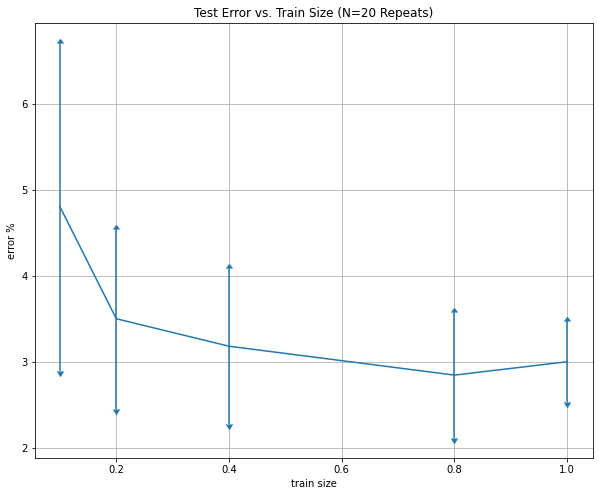

In [ ]:
"""
Plot the results
"""
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.errorbar(train_ratios, 100*test_errors, yerr=100*test_errors_std, uplims=True, lolims=True)
ax.set_xlabel("train size")
ax.set_ylabel("error %")
ax.grid()
ax.set_title("Test Error vs. Train Size (N={} Repeats)".format(num_repeats))
plt.show()

In [ ]:
# let's do the same for the evaluation on the train set
# repeat for train error
num_repeats = 20


X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham


def run_train_and_test_on_train(X, y, train_ratio, test_size, email_pipeline):

    # pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    num_train = int(train_ratio * X_train.shape[0])
    X_train = X_train[:num_train]
    y_train = y_train[:num_train]
    """
    Your Code Here
    """
    # transform the data
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_train)
    # train
    my_classifier = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2, use_log_prob=True)
    my_classifier.fit(X_train_augmented, y_train)
    # test
    y_pred = my_classifier.predict(X_test_augmented)
    
    # calculate error
    err = calc_err(y_pred, y_train)
    return err

train_errors = np.zeros(len(train_ratios))
train_errors_std = np.zeros(len(train_ratios))

for i_grid, train_ratio in enumerate(train_ratios):
    current_errors = np.zeros(num_repeats)
    print("\n current train ratio: {}".format(train_ratio))
    current_errors = np.zeros(num_repeats)
    for i_rep in tqdm(range(num_repeats)):
        current_errors[i_rep] = run_train_and_test_on_train(X, y, train_ratio, test_size, email_pipeline)
    train_errors[i_grid] = np.mean(current_errors)
    train_errors_std[i_grid] = np.std(current_errors)


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.1


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.2


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.4


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 0.8


  0%|          | 0/20 [00:00<?, ?it/s]


 current train ratio: 1


100%|██████████| 20/20 [04:10<00:00, 12.55s/it]


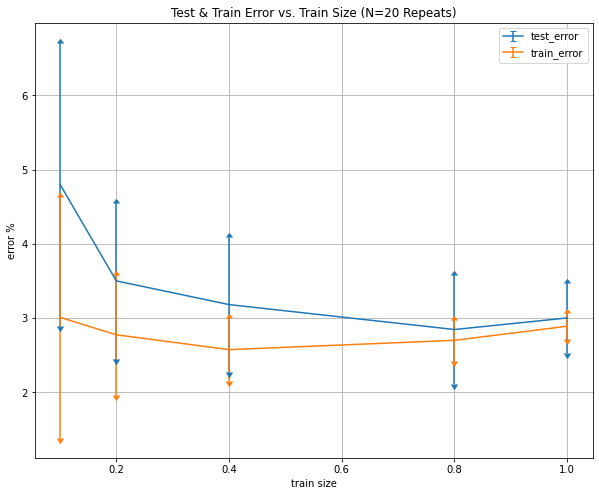

In [ ]:
# plot the 2 graphs
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.errorbar(train_ratios, 100*test_errors, yerr=100*test_errors_std, uplims=True, lolims=True, label="test_error")
ax.errorbar(train_ratios, 100*train_errors, yerr=100*train_errors_std, uplims=True, lolims=True, label="train_error")
ax.set_xlabel("train size")
ax.set_ylabel("error %")
ax.legend()
ax.grid()
ax.set_title("Test & Train Error vs. Train Size (N={} Repeats)".format(num_repeats))
plt.show()

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Notebook made by <a href="mailto:taldanielm@campus.technion.ac.il">Tal Daniel</a> (August 2019)
* Updates: Ron Amit (March 2020)